In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss,confusion_matrix

In [60]:
df=pd.read_csv("transport_data.csv")
df.drop("PersonID",axis=1,inplace=True)
df

,Gender,Age,Occupation,IncomeLevel,DistanceToWork,VehicleOwnership,CityType,PreferredTransport
0,Male,58,Student,Medium,5.3,Yes,Rural,Bike
1,Female,47,Student,Medium,24.9,No,Semiurban,Bike
2,Male,34,Student,Low,4.8,Yes,Urban,Train
3,Male,37,Self-employed,Low,21.0,Yes,Urban,Train
4,Male,42,Self-employed,Medium,20.9,Yes,Semiurban,Train
...,...,...,...,...,...,...,...,...
795,Male,34,Employee,Medium,33.1,Yes,Rural,Train
796,Male,54,Self-employed,Medium,44.6,Yes,Urban,Train
797,Male,42,Employee,Medium,29.4,Yes,Urban,Train
798,Male,55,Self-employed,High,32.0,Yes,Rural,Train


In [61]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Gender,Age,Occupation,IncomeLevel,DistanceToWork,VehicleOwnership,CityType,PreferredTransport
0,1,58,3,2,5.3,1,0,0
1,0,47,3,2,24.9,0,1,0
2,1,34,3,1,4.8,1,2,3
3,1,37,2,1,21.0,1,2,3
4,1,42,2,2,20.9,1,1,3
...,...,...,...,...,...,...,...,...
795,1,34,0,2,33.1,1,0,3
796,1,54,2,2,44.6,1,2,3
797,1,42,0,2,29.4,1,2,3
798,1,55,2,0,32.0,1,0,3


In [62]:
x=df.drop("PreferredTransport",axis=1)
y=df["PreferredTransport"]
y

0      0
1      0
2      3
3      3
4      3
      ..
795    3
796    3
797    3
798    3
799    0
Name: PreferredTransport, Length: 800, dtype: int64

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
model=LogisticRegression()
model.fit(x_train,y_train)


c:\Users\AKASH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [65]:
cross=cross_validate(model,x,y,cv=5,return_train_score=True)
cross

c:\Users\AKASH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\AKASH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://sciki

{'fit_time': array([0.03183436, 0.0292778 , 0.03125238, 0.03086829, 0.02687621]),
 'score_time': array([0.00158596, 0.001508  , 0.00140858, 0.00128937, 0.00131202]),
 'test_score': array([0.4375 , 0.475  , 0.39375, 0.31875, 0.45   ]),
 'train_score': array([0.4328125, 0.4234375, 0.4265625, 0.428125 , 0.41875  ])}

In [66]:
y_prob=model.predict_proba(x_test)
y_prob

array([[0.25752249, 0.20598185, 0.09493628, 0.44155938],
       [0.15675245, 0.09037147, 0.49881244, 0.25406364],
       [0.33713062, 0.37505418, 0.07545853, 0.21235667],
       [0.38171072, 0.26171368, 0.07392721, 0.28264839],
       [0.08333979, 0.19018326, 0.26315462, 0.46332233],
       [0.35216722, 0.23790784, 0.09708619, 0.31283875],
       [0.18488136, 0.44569771, 0.03457668, 0.33484425],
       [0.15866638, 0.31681508, 0.22497487, 0.29954367],
       [0.21393771, 0.12068401, 0.49070561, 0.17467267],
       [0.13035248, 0.22738531, 0.47982178, 0.16244043],
       [0.17861021, 0.34008531, 0.30384835, 0.17745613],
       [0.26955548, 0.33628837, 0.10322384, 0.29093231],
       [0.11486487, 0.23584281, 0.1951897 , 0.45410262],
       [0.20287773, 0.21939403, 0.34029498, 0.23743327],
       [0.09632158, 0.06194067, 0.43750642, 0.40423134],
       [0.21001414, 0.33032667, 0.37365144, 0.08600776],
       [0.06285436, 0.14738844, 0.27954544, 0.51021176],
       [0.21606379, 0.27391115,

In [67]:
loss=log_loss(y_test,y_prob)
loss

1.245220206737693

In [68]:
y_pred=model.predict(x_test)
y_pred


array([3, 2, 1, 0, 3, 0, 1, 1, 2, 2, 1, 1, 3, 2, 2, 2, 3, 3, 2, 2, 0, 1,
       2, 2, 3, 0, 2, 1, 1, 1, 1, 3, 1, 2, 3, 3, 1, 1, 3, 2, 1, 2, 2, 2,
       3, 3, 2, 3, 3, 2, 3, 2, 1, 2, 1, 1, 2, 1, 2, 1, 3, 1, 3, 3, 2, 3,
       3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 0, 3, 2, 3, 2, 2, 2, 3, 2, 1, 3, 3,
       1, 2, 1, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 1, 2, 3, 2, 3, 1, 3, 1,
       2, 3, 3, 2, 3, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       3, 2, 2, 1, 3, 1, 3, 0, 1, 3, 3, 2, 2, 2, 0, 3, 2, 3, 1, 2, 3, 2,
       3, 2, 2, 3, 2, 1])

In [69]:
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy:{accuracy*100:.2f}%")

accuracy:41.88%


In [70]:
cm=confusion_matrix(y_test,y_pred)

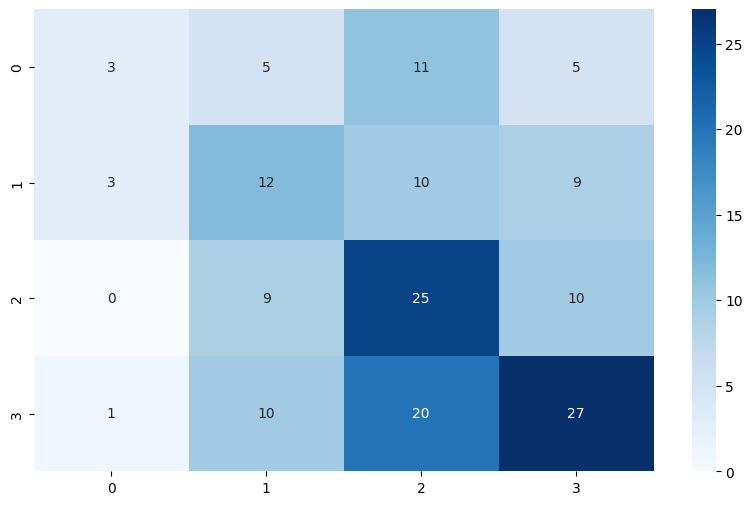

In [71]:
plt.figure(figsize=[10,6])
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.show()

In [75]:
data=pd.DataFrame({
    "Gender":label.fit_transform(["Male"]),
    "Age":[58],
    "Occupation":label.fit_transform(["Self-employed"]),
    "IncomeLevel":label.fit_transform(["Medium"]),
    "DistanceToWork":[5.3],
    "VehicleOwnership":label.fit_transform(["Yes"]),
    "CityType":label.fit_transform(["Rural"])

})

pre=model.predict(data)
pre

array([0])